In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random
import seaborn as sns
import pickle

/home/bulat/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
with open('PointNet/output/ds.pkl', 'rb') as f:
    ds = pickle.load(f)

In [6]:
ds['pointcloud'].shape

torch.Size([2, 38793, 3])

In [4]:
INPUT_PATH = 'input/'

In [61]:
# Reading the training dataset
train_data = np.load(INPUT_PATH + "train.npz", allow_pickle=True)
train_data = train_data['train']

test_data = np.load(INPUT_PATH + "test.npz", allow_pickle=True)
test_data = test_data['test']

train_data.shape, test_data.shape

((400, 2), (601,))

In [65]:
train_data[0][1]

1

In [58]:
# Getting a random 3D lidar sample data
INDEX = random.randint(0, train_data.shape[0])

# Getting the individual x,y and z points.
x = train_data[INDEX][0][:, 0].tolist()
y = train_data[INDEX][0][:, 1].tolist()
z = train_data[INDEX][0][:, 2].tolist()

# Label for the corrosponding sample ( no. of cars )
label  = train_data[INDEX][1]

# Generating the 3D graph
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(
                                   size=1,       
                                   colorscale='Viridis',
                                   opacity=0.8))])
print("No. of cars : ", label)
fig.show()

No. of cars :  3


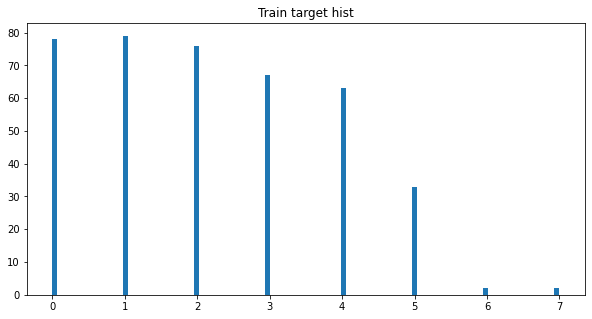

In [16]:
plt.figure(figsize=(10,5))
plt.hist(train_data[:,1], bins=100);
plt.title('Train target hist');

In [39]:
# Nums of points in each snap at train and test
np.unique([snap[0].shape[0] for snap in train_data]), np.unique([snap.shape[0] for snap in test_data])

(array([38793]), array([38793]))

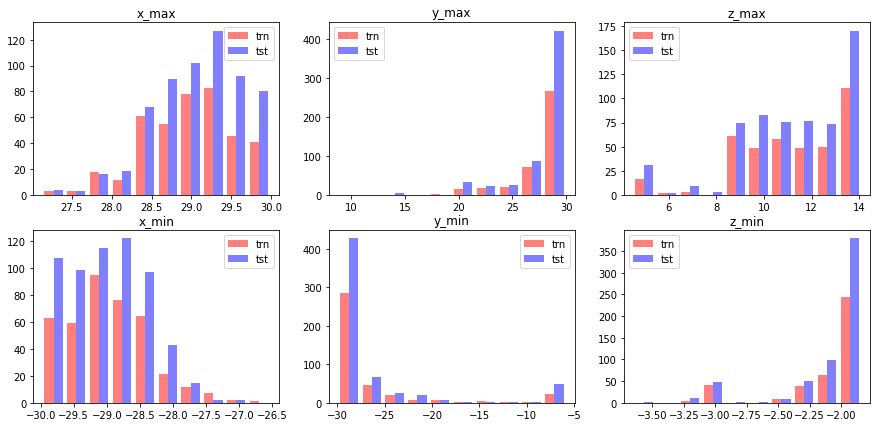

In [57]:
# Train
x_max_trn = [snap[0][:,0].max() for snap in train_data]
x_min_trn = [snap[0][:,0].min() for snap in train_data]

y_max_trn = [snap[0][:,1].max() for snap in train_data]
y_min_trn = [snap[0][:,1].min() for snap in train_data]

z_max_trn = [snap[0][:,2].max() for snap in train_data]
z_min_trn = [snap[0][:,2].min() for snap in train_data]

# Test
x_max_tst = [snap[:,0].max() for snap in test_data]
x_min_tst = [snap[:,0].min() for snap in test_data]

y_max_tst = [snap[:,1].max() for snap in test_data]
y_min_tst = [snap[:,1].min() for snap in test_data]

z_max_tst = [snap[:,2].max() for snap in test_data]
z_min_tst = [snap[:,2].min() for snap in test_data]

plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.hist([x_max_trn, x_max_tst], color=['r','b'], alpha=0.5);
plt.legend(['trn', 'tst']);
plt.title('x_max');

plt.subplot(2,3,2)
plt.hist([y_max_trn, y_max_tst], color=['r','b'], alpha=0.5);
plt.legend(['trn', 'tst']);
plt.title('y_max');

plt.subplot(2,3,3)
plt.hist([z_max_trn, z_max_tst], color=['r','b'], alpha=0.5);
plt.legend(['trn', 'tst']);
plt.title('z_max');

plt.subplot(2,3,4)
plt.hist([x_min_trn, x_min_tst], color=['r','b'], alpha=0.5);
plt.legend(['trn', 'tst']);
plt.title('x_min');

plt.subplot(2,3,5)
plt.hist([y_min_trn, y_min_tst], color=['r','b'], alpha=0.5);
plt.legend(['trn', 'tst']);
plt.title('y_min');

plt.subplot(2,3,6)
plt.hist([z_min_trn, z_min_tst], color=['r','b'], alpha=0.5);
plt.legend(['trn', 'tst']);
plt.title('z_min');

In [60]:
train_data[0].shape

(2,)